<a href="https://colab.research.google.com/github/nguynphm56/Data_Mining/blob/main/20520661_Ph%E1%BA%A1m_Ng%E1%BB%8Dc_Nguy%C3%AAn_Lab4_BTVN_B%C3%A0i_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài 6. (Lập trình) Sử dụng thuật toán k-Means để giảm số màu trong ảnh từ đó giảm kích
thước file ảnh theo ý muốn.

Khai báo các thư viện

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Đọc vào file ảnh cần giảm kích thước và hiển thị ra màn hình

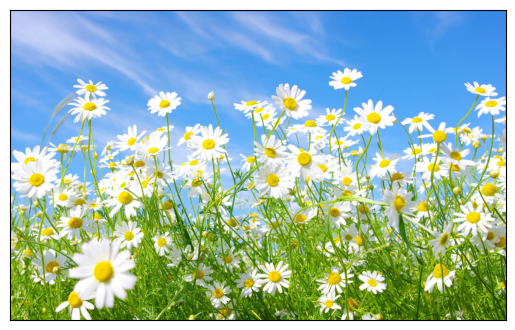

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/daisy.jpg')
axes = plt.axes(xticks=[], yticks=[])
axes.imshow(image)

Chuyển ảnh đọc được thành mảng số và lấy thông tin chiều rộng, cao của ảnh

In [ ]:
imarr = np.array(image)
rows = imarr.shape[0]
cols = imarr.shape[1]

Biến đổi các giá trị màu từ đoạn [0...255] về đoạn [0...1] và chuyển dạng mảng từ 3
chiều (cao, rộng, sâu) thành 2 chiều (cao x rộng, sâu).

In [ ]:
data = imarr / 255.0
data = data.reshape(rows * cols, 3)
data.shape

(2304000, 3)

Chạy thuật toán gom cụm với số màu mong muốn là 32. Tiếp theo đó, lấy ra mảng
biểu diễn hình sau khi đã gom cụm.

In [ ]:
kmeans = KMeans(n_clusters = 32, max_iter=300)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khôi phục dạng mảng vừa thu được từ 2 chiều thành 3 chiều như ban đầu

In [ ]:
img_recolored = new_colors.reshape(imarr.shape)

Biểu diễn hình kết quả và so sánh với ảnh gốc ban đầu

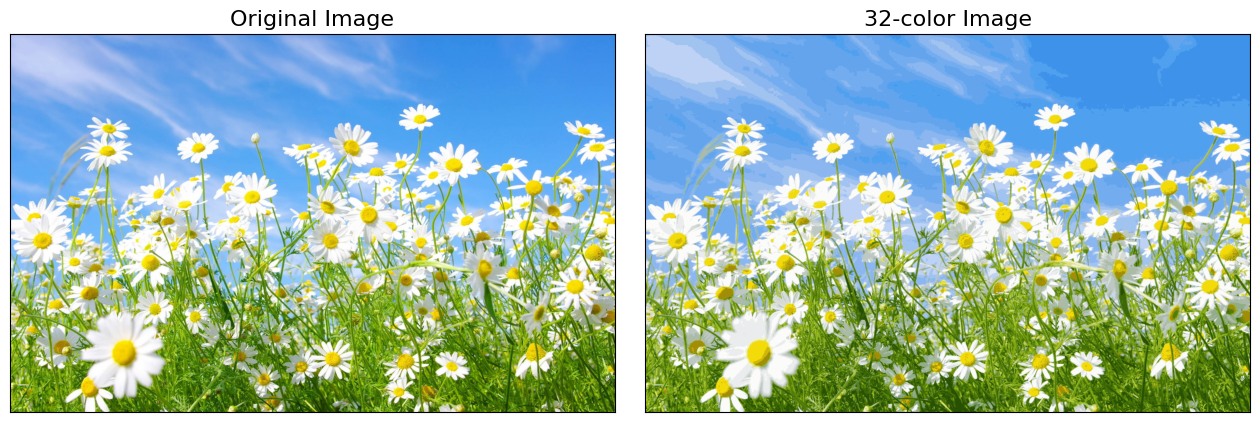

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('32-color Image', size=16);

Lưu hình kết quả xuống đĩa cứng

In [ ]:
img_recolored = img_recolored * 255
new_img = Image.fromarray(img_recolored.astype(np.uint8))
new_img.save('/content/drive/MyDrive/Colab Notebooks/compressed_img2.png')